# Key functions and tool used for ICEO BS analysis

**Goal**

- Load the data
- Compute the LoC and RoC 
- Visualize LoC and RoC on a spectrogram



In [21]:
import mne
from boost_loc_roc.LoC_RoC import extract_loc_roc, Truncate_fif, plot_spectrogram


In [22]:
# Here we load one EEG recording
filename = 'data/raw/eeg_example.fif'
file_tmp = mne.io.read_raw_fif(filename)

Opening raw data file data/raw/eeg_example.fif...
Isotrak not found
    Range : 0 ... 82217 =      0.000 ...   922.989 secs
Ready.


/tmp/ipykernel_29775/2251230688.py:3: RuntimeWarning: This filename (data/raw/eeg_example.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  file_tmp = mne.io.read_raw_fif(filename)


# LoC/RoC detection 


**Remark**
The following code is used on ICEO file but should be easily extended to other dataset. 

This step can be embedded directly in the loop dealing with other segmentation processes.

The following cell is thus only for pedagogical purposes, but can also serve as an inspection step. 

Creating RawArray with float64 data, n_channels=4, n_times=78628
    Range : 0 ... 78627 =      0.000 ...   882.687 secs
Ready.
sfreq 89.07691955566406
Effective window size : 8.127 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/home/vloison/miniconda3/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/vloison/miniconda3/envs/loc-roc/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/vloison/miniconda3/envs/loc-roc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/vloison/miniconda3/envs/loc-

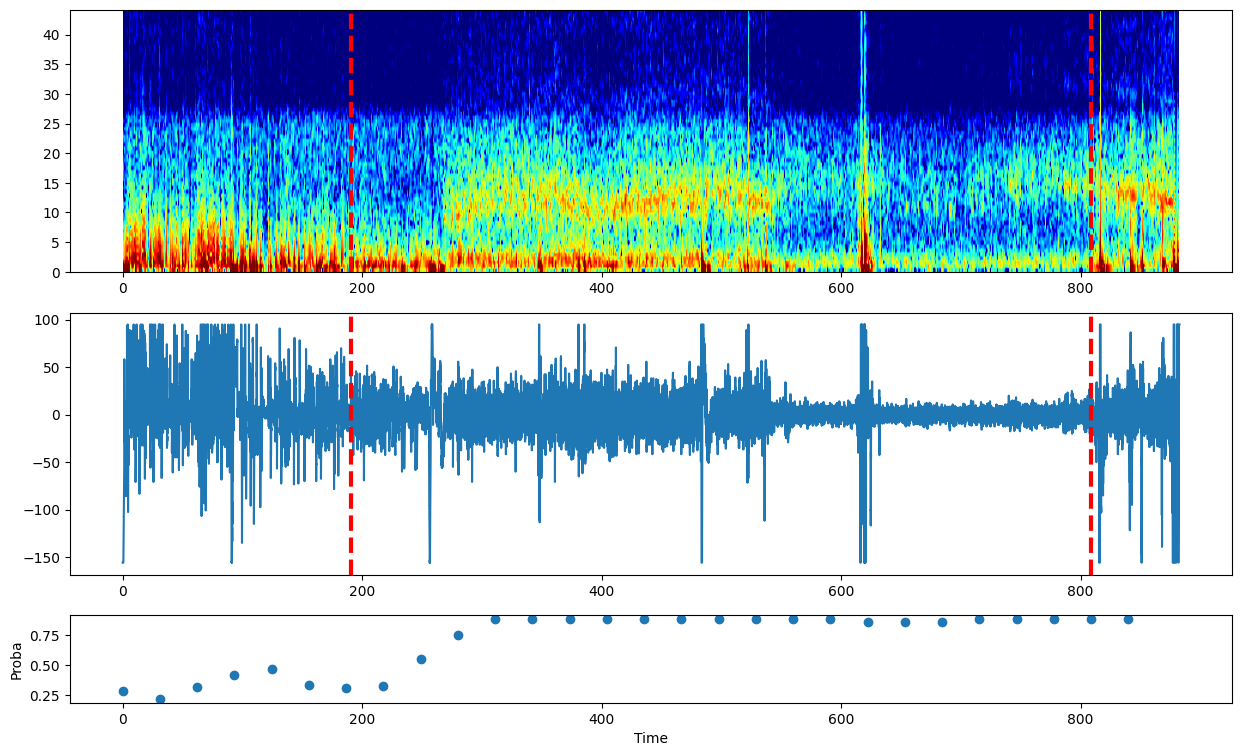

CPU times: user 758 ms, sys: 19.6 ms, total: 777 ms
Wall time: 776 ms


In [23]:
%%time

file_tmp = Truncate_fif(file_tmp)
duration_sec = file_tmp.n_times / file_tmp.info['sfreq']
print('sfreq', file_tmp.info['sfreq'])

if duration_sec > 5 * 60:
    # Extract sampling frequency and make a time vector
    Fs = file_tmp.info['sfreq']  # Hz
    time = np.linspace(0, file_tmp.get_data().shape[1]/Fs, file_tmp.get_data().shape[1], endpoint=False)
    Fp2 = file_tmp.get_data()[1,:]*10**6  # 10*6 because .fif is saved in Volts
    
    # Compute LoC and RoC
    time_loc, time_roc, t_proba, proba = extract_loc_roc(file_tmp)

    # Visualize Spectrogram, EEG, and proba
    plot_spectrogram(time_loc, time_roc, Fp2, Fs, time, t_proba, proba)